In [2]:
from supervised_training import *

Using Theano backend.


In [8]:
# game variables
epochs = 10
batch_size = 10
learning_rate = 0.05
steps = 1000
training_game_size = 8

# layers
layers = [{"size":5,"activation":"tanh"},
            {"size":5,"activation":"tanh"}]

# number of epochs for training
epochs = epochs
batch_size = batch_size

# learning rate
learning_rate = learning_rate

# number of steps to take
steps = steps

# optimizer
optimizer = sgd(lr=learning_rate)
optimizer_str = "SGD(lr = "+str(learning_rate)+")"
# make the model
model = baseline_model(optimizer, layers)

# prepare the game for collecting data
# this has no model, so it uses the "perfect" strategy defined within
test_game = NaviGame(training_game_size,
                    training_game_size,
                    moving_target = True)
test_game.setup()

print("Generating training data")
# collect all data to make pickled runs!
# stop regenerating the damn data!
log, inputs, targets = train_model(
            navi_game = test_game,
            model = model,
            steps = steps,
            epochs = epochs,
            batch_size = batch_size,
            verbose = 1,
            all_data = True)
# pull data points of for validation
print("Network and final validation data ready for testing.")
    # prepare the game for final validation


Generating training data
Data generated, now fitting network
Epoch 1/10
1004/1004 [==============================] - 0s - loss: 0.2316     
Epoch 2/10
1004/1004 [==============================] - 0s - loss: 0.1749     
Epoch 3/10
1004/1004 [==============================] - 0s - loss: 0.1635     
Epoch 4/10
1004/1004 [==============================] - 0s - loss: 0.1590     
Epoch 5/10
1004/1004 [==============================] - 0s - loss: 0.1567     
Epoch 6/10
1004/1004 [==============================] - 0s - loss: 0.1550     
Epoch 7/10
1004/1004 [==============================] - 0s - loss: 0.1534     
Epoch 8/10
1004/1004 [==============================] - 0s - loss: 0.1516     
Epoch 9/10
1004/1004 [==============================] - 0s - loss: 0.1493     
Epoch 10/10
1004/1004 [==============================] - 0s - loss: 0.1468     
Network and final validation data ready for testing.


In [9]:
val_game = NeuralNaviGame(8, 8, model = model, model_type = "supervised")

In [10]:
val_game.setup()

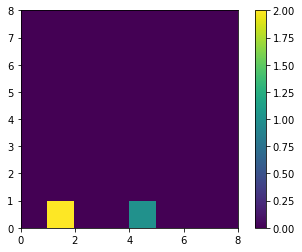

None

In [12]:
animate_game(val_game, n = 10)